# 极限挑战 bullet scrren analysis - Bilibili

analysis about bullet screen from the movie *Harry Potter and the Sorcerer's Stone* on video website Bilibili

In [1]:
import pandas as pd
import requests
import jieba
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from jieba import analyse

## 弹幕获取
弹幕列表：contents

In [2]:
# 弹幕位置的固定格式 http://comment.bilibili.com/+cid+.xml
# 详情见文章 https://www.jb51.net/article/236663.htm
# https://api.bilibili.com/x/player/pagelist?bvid=BV1qt411j7fV

url = "https://comment.bilibili.com/168497302.xml"

In [3]:
# 假装浏览器
header ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43'
}

# 发送请求
req = requests.get(url = url, headers=header)
# 获取内容响应的内容
html_byte = req.content
# 将byte转为str
html_str = str(html_byte,"utf-8")

In [4]:
# 解析
soup = BeautifulSoup(html_str,'html.parser')
#找到html文件里的<d>标签
results = soup.find_all('d')
#把标签里的文本提取出来
contents = [x.text for x in results]
#存为字典
dic ={"contents" : contents}

## 弹幕分析

### 初始化

In [5]:
df = pd.DataFrame(dic)
df["contents"]

0              中单黄磊 辅助小猪 打野渤哥
1               这里渤哥好宠啊啊啊啊啊啊啊
2                这个时候严导还是有点肉的
3                 渤哥：涮一下就是我的了
4       只要你语速够快就能顺手牵走一只懵b羊哈哈哈
                ...          
9595                       杀猪
9596         张拿了人家给的时间，最后不办人事
9597                      好废啊
9598              张艺兴了感觉他作用不大
9599                      我好急
Name: contents, Length: 9600, dtype: object

### 最多弹幕

In [6]:
df.value_counts()[:20]

contents         
哈哈哈哈哈哈哈              142
哈哈哈哈哈哈               125
哈哈哈哈哈                113
哈哈哈哈哈哈哈哈              97
哈哈哈哈哈哈哈哈哈             93
哈哈哈哈哈哈哈哈哈哈            82
哈哈哈哈                  74
哈哈哈哈哈哈哈哈哈哈哈           61
梦开始的地方                54
哈哈哈哈哈哈哈哈哈哈哈哈哈哈        50
哈哈哈                   47
哈哈哈哈哈哈哈哈哈哈哈哈          34
哈哈哈哈哈哈哈哈哈哈哈哈哈         34
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈     27
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈       17
极限挑战，这就是命             14
哈哈                    14
《孙大哥》                 13
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈      11
笑死我了                  11
dtype: int64

### 词频统计
部分结果在 jixian_b_result.txt

In [7]:
# jieba.load_userdict("哈利波特词表.txt")

In [31]:
b_all_danmu_text = ""
for i in contents:
    b_all_danmu_text+=i+' '
a = jieba.lcut(b_all_danmu_text, cut_all=False)

In [32]:
counts={}
for word in a:
    counts[word] = counts.get(word,0)+1

In [33]:
# excludes = {"，","：","“","。","”","、","；","！","？","."}
excludes=[]
tingyongci = open("停用词.txt",'r')
print(tingyongci.readline()[:-1])
for i in tingyongci.readlines():
    excludes.append(i[:-1])
for word in excludes:
    try:
        del counts[word]
    except:
        pass

!


In [34]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse = True)

In [35]:
hp_qq_result = open("jixian_b_result.txt","w")
for i in range(200):
    word, count = items[i]
    hp_qq_result.writelines("{0:<10}{1:>5}\n".format(word,count))
hp_qq_result.close()

In [36]:
test_word = "哈哈"

count = 0
for i in df["contents"]:
    if test_word in i:
        count+=1

print(count)

2687


### 情感分析

In [37]:
from snownlp import SnowNLP

In [38]:
df['emotion'] = df['contents'].apply(lambda x: SnowNLP(x).sentiments)
df.head()

,contents,emotion
0,中单黄磊 辅助小猪 打野渤哥,0.815210
1,这里渤哥好宠啊啊啊啊啊啊啊,0.998178
2,这个时候严导还是有点肉的,0.491427
3,渤哥：涮一下就是我的了,0.350725
4,只要你语速够快就能顺手牵走一只懵b羊哈哈哈,0.995947


In [39]:
df['emotion'].describe()

count    9600.000000
mean        0.667365
std         0.292673
min         0.000002
25%         0.466633
50%         0.735654
75%         0.942196
max         1.000000
Name: emotion, dtype: float64

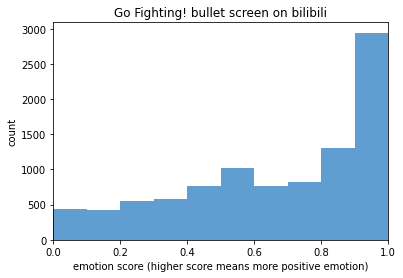

In [40]:
#  绘制情感分直方图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 
bins = np.arange(0, 1.1, 0.1)
plt.hist(df['emotion'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('emotion score (higher score means more positive emotion)')
plt.ylabel('count')
plt.title('Go Fighting! bullet screen on bilibili')
plt.show()

In [41]:
key_words = jieba.analyse.extract_tags(sentence=b_all_danmu_text, topK=10, withWeight=True, allowPOS=())
key_words

[('哈哈哈', 1.2663099352838902),
 ('哈哈哈哈', 0.5408917270240909),
 ('哈哈', 0.11244610816948052),
 ('艺兴', 0.11134572907069396),
 ('王迅', 0.09683941929739932),
 ('小猪', 0.0774978550916765),
 ('雷磊', 0.07253154886647317),
 ('红雷', 0.06900298702972583),
 ('黄磊', 0.06821886217711531),
 ('迅哥', 0.06547442519297848)]

In [42]:
df_bad=df[df['emotion']<0.2]
df_bad.head()

,contents,emotion
15,三傻里面红雷哥锁了门,0.109750
30,严导这时候还是寸头,0.123460
31,拖着（物理）,0.197133
56,虚假的大哥vs真正的大哥,0.017693
57,一周后：这是信任的问题，信任！,0.176490


In [43]:
bad_text = ''
for i in df_bad['contents']:
    bad_text += i
#消极评论关键词top10
key_words = jieba.analyse.extract_tags(sentence=bad_text, topK=100, withWeight=True, allowPOS=())
key_words

[('顺序', 0.21412325821450992),
 ('叫醒', 0.18527650039555024),
 ('孙红雷', 0.15965529353301264),
 ('渤迅', 0.15096218734870714),
 ('吸吸', 0.110179891587282),
 ('艺兴', 0.0970471204384546),
 ('黄磊', 0.0970471204384546),
 ('红雷', 0.08626410705640408),
 ('孙大哥', 0.08339090195411906),
 ('起床', 0.0800281443752345),
 ('张艺兴', 0.07188675588033674),
 ('极限', 0.06643782473326518),
 ('大哥', 0.0568573510671828),
 ('12', 0.05391506691025256),
 ('时间', 0.04783585257544799),
 ('迅哥', 0.04672639132221888),
 ('双黄', 0.04495976275694528),
 ('磊磊', 0.04368094864263379),
 ('就是', 0.04327335066434155),
 ('渤哥', 0.04313205352820204),
 ('知道', 0.04062528273000601),
 ('这时候', 0.038404993830372824),
 ('小猪', 0.03775510553944678),
 ('不是', 0.03760184447651834),
 ('红雷哥', 0.03594337794016837),
 ('这个', 0.03324927187005713),
 ('早上', 0.03264652545744137),
 ('严导', 0.03234904014615153),
 ('蓝队', 0.03234904014615153),
 ('后面', 0.02935097656649429),
 ('一个', 0.028802385163084785),
 ('王迅', 0.028754702352134696),
 ('钥匙', 0.028627291327179796),
 ('这里',

In [44]:
df[df['contents'].str.contains("VIP")]

,contents,emotion


In [45]:
df[df['contents'].str.contains("会员")]

,contents,emotion
1372,向往6过来、又充了一季大会员、希望他们能再重聚一次我就心满意足了,0.859151
1631,开会员看极限,0.067371
2189,对吼 第一期不用会员,0.494402
3872,俄乌大战时期，当年优酷开会员看的,0.981106
4054,恭喜恭喜！第二期见~因为极挑开了年度会员,0.419850
5085,我也是想在b站看视频才充会员的,0.921435
5217,为看艺兴充会员！！！,0.215307
7824,充了会员，好想你们啊,0.477513
7864,真的好想开会员,0.284938
8312,第二季第一集见! 贫穷的会员们!,0.944408


In [46]:
df[df['contents'].str.contains("疫情")]

,contents,emotion
8266,说起疫情，我现在就在病房里治疗新冠，真的好难受,0.622290
9156,那个时候还没有疫情,0.548818
9480,疫情后第三个5月,0.151042
9564,怀念没有疫情时的上海,0.593291
